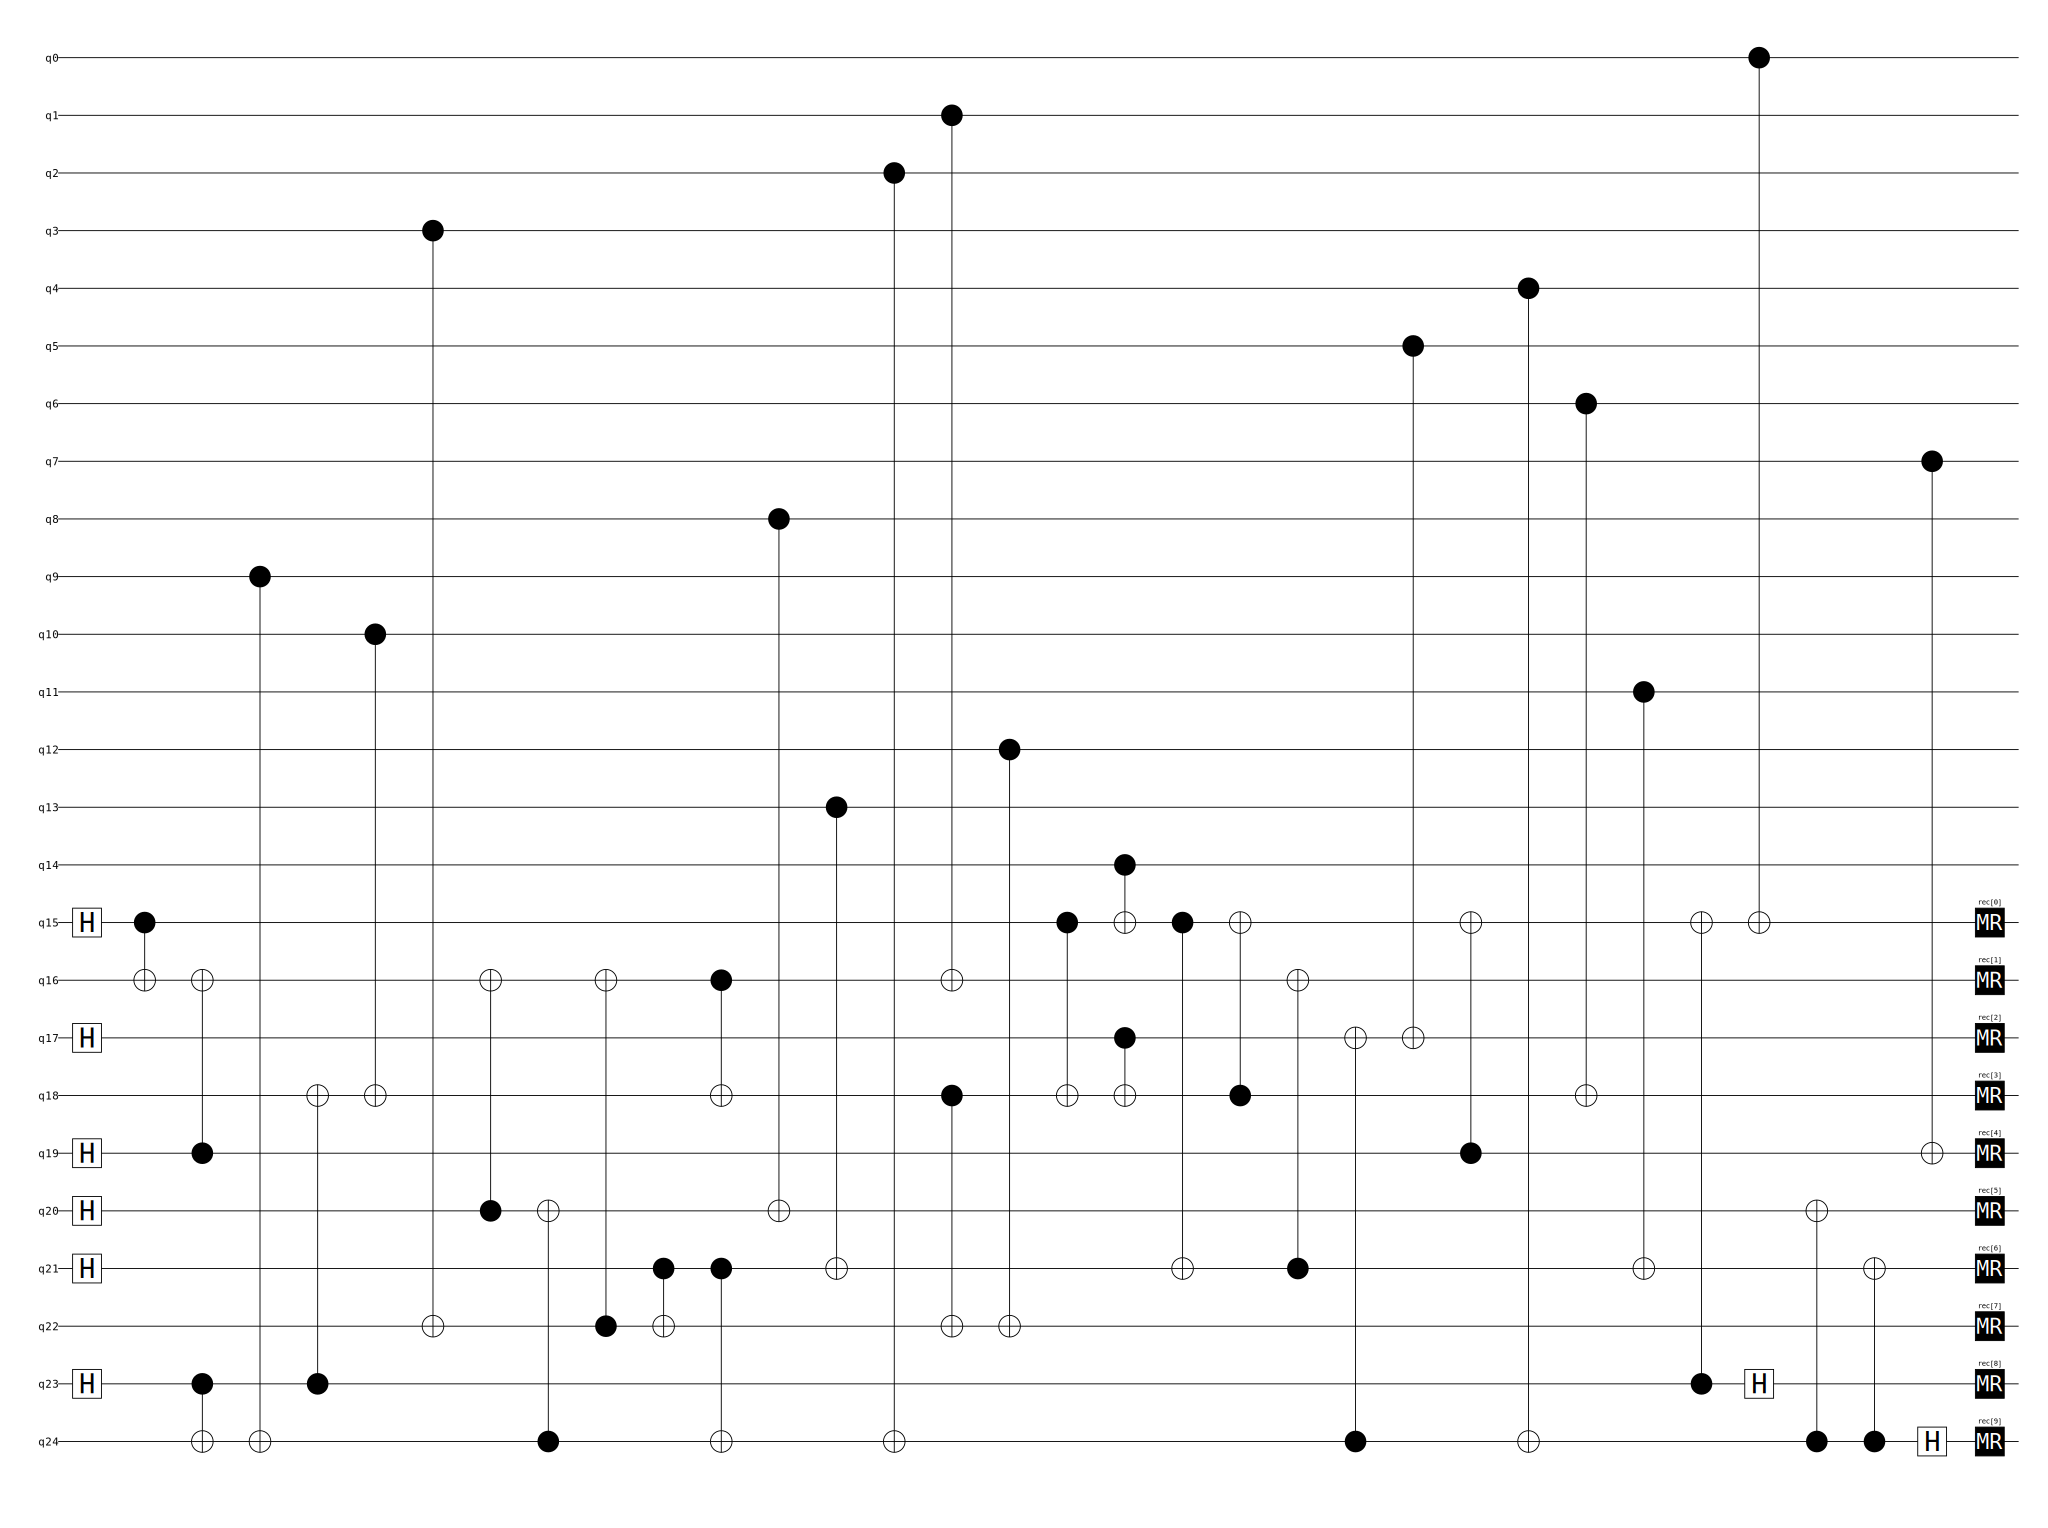

In [1]:
import stim

z_syndrome_meas = stim.Circuit("""
H 15 17 19 20 21 23
CX 15 16 19 16 23 24 9 24 23 18 10 18 3 22 20 16 24 20 22 16 21 22 21 24 16 18 8 20 13 21 2 24 1 16 18 22 12 22 15 18 14 15 17 18 15 21 18 15 21 16 24 17 5 17 19 15 4 24 6 18 11 21 23 15 0 15
H 23
CX 24 20 24 21
H 24
CX 7 19
MR 15 16 17 18 19 20 21 22 23 24
""")
z_syndrome_meas.diagram('timeline-svg')

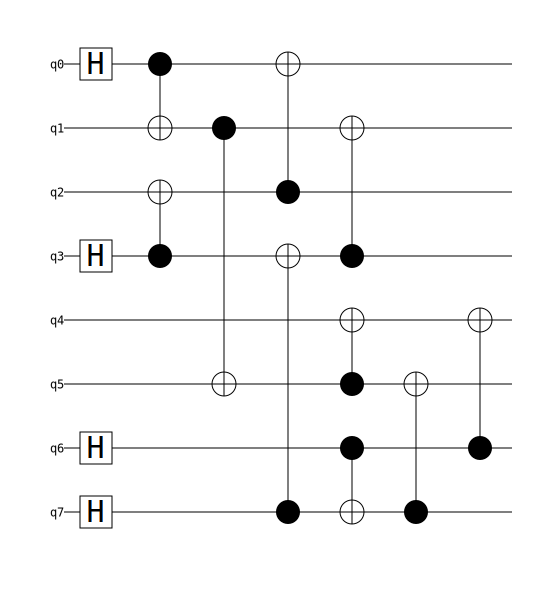

In [3]:
from verify_fault_tolerance import *

code_8_3_2_SP().diagram('timeline-svg')

In [4]:
code_8_3_2_SP()

stim.Circuit('''
    H 0 3 6 7
    CX 0 1 3 2 1 5 2 0 7 3 3 1 5 4 6 7 7 5 6 4
''')

In [14]:
c = stim.Circuit('''
H 2 3 4 5 6 7 8 9 10 13 14 15 16
CX 10 0 0 1 7 1 3 12 6 10 8 1 4 11 11 3 13 11 9 8 14 0 10 12 3 1 5 6 0 11 6 0 7 0 1 10 11 1 9 4 2 4 4 5 15 0 15 9 15 10 16 4 16 8 16 11
H 15 16
MR 15 16
DETECTOR rec[-2]
DETECTOR rec[-1]
''')

In [17]:
def circuit_in_complementary_basis(circuit: stim.Circuit) -> stim.Circuit:
    num_qubits = circuit.num_qubits
    dual_circuit = stim.Circuit()
    for operation in circuit:
        if operation.name == 'H':
            targets = [t.value for t in operation.targets_copy()]
            dual_circuit.append("H", [i for i in range(num_qubits) if i not in targets])
        elif operation.name == 'CX':
            targets = [t.value for t in operation.targets_copy()]
            target_pairs = [[targets[i], targets[i + 1]] for i in range(0, len(targets), 2)]
            print(target_pairs)
            for c, n in target_pairs:
                dual_circuit.append("CX", [n, c])
        else:
            dual_circuit.append(operation)

        print(operation.name)
    return dual_circuit



circuit_in_complementary_basis(c)

H
[[10, 0], [0, 1], [7, 1], [3, 12], [6, 10], [8, 1], [4, 11], [11, 3], [13, 11], [9, 8], [14, 0], [10, 12], [3, 1], [5, 6], [0, 11], [6, 0], [7, 0], [1, 10], [11, 1], [9, 4], [2, 4], [4, 5], [15, 0], [15, 9], [15, 10], [16, 4], [16, 8], [16, 11]]
CX
H
MR
DETECTOR
DETECTOR


stim.Circuit('''
    H 0 1 11 12
    CX 0 10 1 0 1 7 12 3 10 6 1 8 11 4 3 11 11 13 8 9 0 14 12 10 1 3 6 5 11 0 0 6 0 7 10 1 1 11 4 9 4 2 5 4 0 15 9 15 10 15 4 16 8 16 11 16
    H 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    MR 15 16
    DETECTOR rec[-2]
    DETECTOR rec[-1]
''')

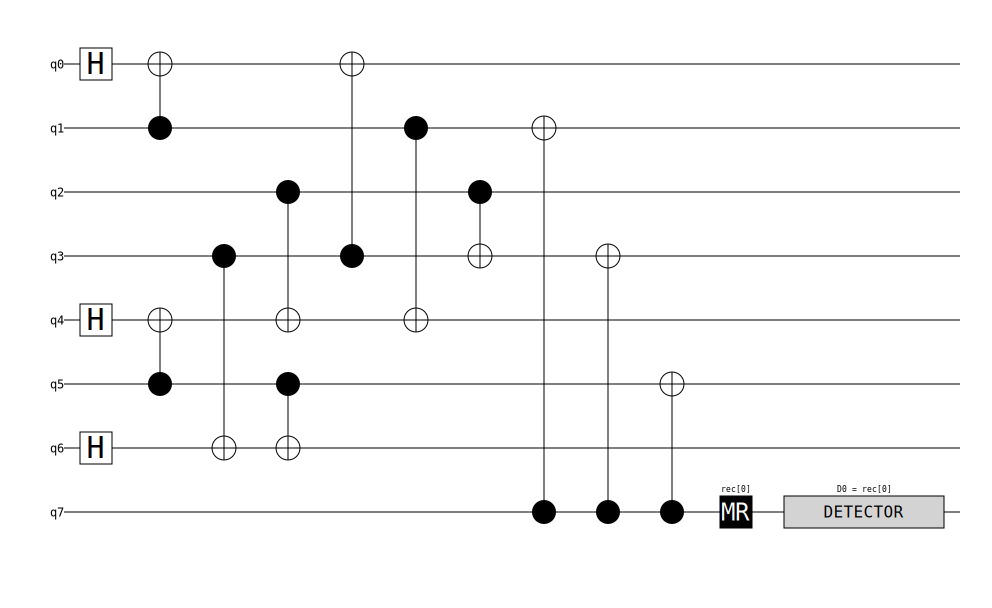

In [7]:
stim.Circuit('''
    H 0 4 6
    CX 1 0 5 4 3 6 5 6 2 4 3 0 1 4 2 3 7 1 7 3 7 5
    MR 7
    DETECTOR rec[-1]
''').diagram('timeline-svg')